A 'black box' implementation of a tree generator using 'nonisomorphic_trees' generator from networkx

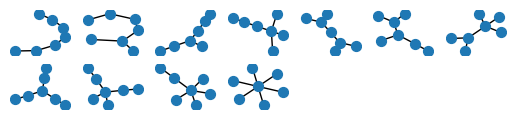

In [ ]:
from networkx.generators.nonisomorphic_trees import nonisomorphic_trees
import matplotlib.pyplot as plt

def get_trees(n):
  return list(nonisomorphic_trees(n))

def display_trees(n):
  for i in range(len(get_trees(n))):
    G = get_trees(n)[i]
    plot = plt.subplot(n,n,i+1)
    nx.draw(G, node_size=50)

display_trees(7)

A more transparent approach, based on code by Gareth Rees on StackExchange. This code displays all trees with up to and including N vertices.

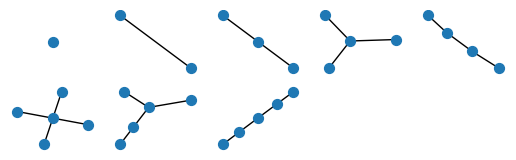

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.classic import trivial_graph

def free_trees(n):
    """Return list of free trees with up to n vertices."""
    result = trees = [trivial_graph()]
    for i in range(n - 1):
        trees = augmented_graphs(trees)
        result.extend(trees)
    return result

def get_trees(n):
  return list(free_trees(n))

def display_trees(n):
  for i in range(len(get_trees(n))):
    G = get_trees(n)[i]
    plot = plt.subplot(n,n,i+1)
    nx.draw(G, node_size=50)

display_trees(5)

Gareth's helper functions:

In [ ]:
def leaf_copy(graph, newNode, toNode):
    g = nx.Graph.copy(graph)
    g.add_node(newNode)
    g.add_edge(newNode,toNode)
    return g


def augmented_graphs(graphs):
    """Return a list of the graphs that can be constructed by attaching a
    new node to any of the nodes in any of the graphs in the argument.

    """
    result = []
    for old_graph in graphs:
        new_node = max(old_graph.nodes()) + 1
        for node in old_graph.nodes():
            new_graph = leaf_copy(old_graph, new_node, node)
            if not any(nx.is_isomorphic(new_graph, g) for g in result):
                result.append(new_graph)
    return result